In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:

# Criando geradores de imagem
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # Normalizando e dividindo em treino e validação

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Visão Computacional/Trabalho Bimestral - 5,0/Fruit-262',
    target_size=(32, 32),
    batch_size=8,  # Reduzindo o batch size para 16
    class_mode='categorical',
    subset='training') # Conjunto de treinamento

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Visão Computacional/Trabalho Bimestral - 5,0/Fruit-262',
    target_size=(32, 32),
    batch_size=16,  # Reduzindo o batch size para 16
    class_mode='categorical',
    subset='validation') # Conjunto de validação


# Construindo o modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 classes de frutas

# Compilando o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Found 7802 images belonging to 10 classes.
Found 1947 images belonging to 10 classes.
Epoch 1/10
976/976 [==============================] - 71s 70ms/step - loss: 1.5263 - accuracy: 0.4589 - val_loss: 1.2375 - val_accuracy: 0.5752
Epoch 2/10
976/976 [==============================] - 58s 60ms/step - loss: 1.0691 - accuracy: 0.6333 - val_loss: 1.1244 - val_accuracy: 0.5881
Epoch 3/10
976/976 [==============================] - 61s 63ms/step - loss: 0.8900 - accuracy: 0.6980 - val_loss: 0.9948 - val_accuracy: 0.6518
Epoch 4/10
976/976 [==============================] - 63s 65ms/step - loss: 0.7904 - accuracy: 0.7358 - val_loss: 0.9251 - val_accuracy: 0.6718
Epoch 5/10
976/976 [==============================] - 59s 60ms/step - loss: 0.6928 - accuracy: 0.7612 - val_loss: 0.8692 - val_accuracy: 0.6990
Epoch 6/10
976/976 [==============================] - 60s 61ms/step - loss: 0.6067 - accuracy: 0.7904 - val_loss: 0.8144 - val_accuracy: 0.7083
Epoch 7/10
976/976 [==============================

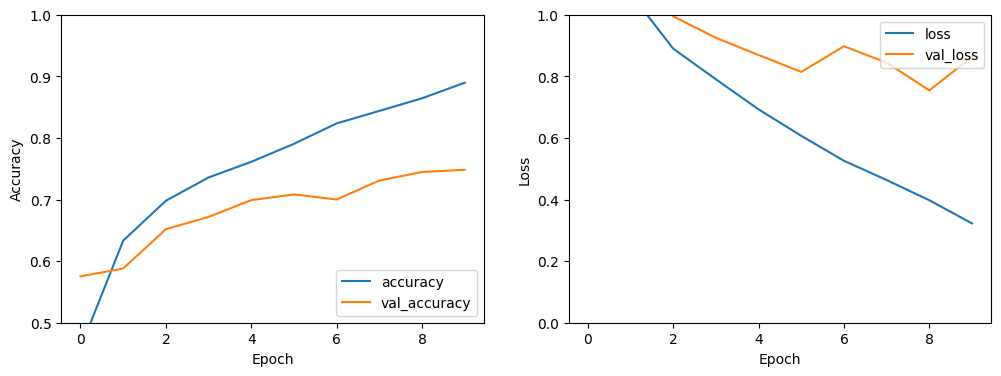

In [8]:
import matplotlib.pyplot as plt

# Plotando o gráfico de acurácia
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Plotando o gráfico de perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')

plt.show()


In [15]:
import os
import numpy as np

# Diretório raiz das imagens
image_directory = '/content/drive/MyDrive/Visão Computacional/Trabalho Bimestral - 5,0/Fruit-262'

# Percorrendo as subpastas
for root, dirs, files in os.walk(image_directory):
    for filename in files:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(root, filename)

            # Carregando uma nova imagem
            new_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(32, 32))
            new_image = tf.keras.preprocessing.image.img_to_array(new_image)
            new_image = new_image.reshape((1, new_image.shape[0], new_image.shape[1], new_image.shape[2]))
            new_image = new_image / 255.0  # normalizando a imagem

            # Fazendo a inferência
            predictions = new_model.predict(new_image)
            predicted_class = np.argmax(predictions[0])  # a classe prevista será a de maior valor de probabilidade
            print('Predicted class:', predicted_class)


A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 40ms/step
Predicted class: 9
1/1 [==============================] - 0s 41ms/step
Predicted class: 9
1/1 [==============================] - 0s 56ms/step
Predicted class: 9
1/1 [==============================] - 0s 51ms/step
Predicted class: 9
1/1 [==============================] - 0s 39ms/step
Predicted class: 9
1/1 [==============================] - 0s 38ms/step
Predicted class: 9
1/1 [==============================] - 0s 54ms/step
Predicted class: 9
1/1 [==============================] - 0s 37ms/step
Predicted class: 9
1/1 [==============================] - 0s 50ms/step
Predicted class: 9
1/1 [==============================] - 0s 53ms/step
Predicted class: 9
1/1 [==============================] - 0s 55ms/step
Predicted class: 9
1/1 [==============================] - 0s 44ms/step
Predicted class: 9
1/1 [==============================] - 0s 79ms/step
Predicted class: 9
1/1 [=============